# Imported Libraries

In [166]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay 
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, classification_report

# Imported the data set and created a copy

In [68]:
Data1 = pd.read_csv("train.csv")

In [69]:
Data1.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [70]:
Data1.shape

(39161, 19)

In [71]:
Data=Data1.copy()

# EDA




## Created a function to check shape, missing count, unique count and percent of missing 

In [74]:
def df_details(df):
    missing_count = df.isnull().sum().sort_values(ascending=False)
    missing_percent =round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False),2)
    unique_values = df.nunique()
    missing_unique = pd.concat([missing_count,missing_percent,df.nunique()],axis=1,  keys = ['missing_count','missing_percent','unique_counts'])
    print("No of Columns : ",df.shape[1])
    print("No of Rows : ",df.shape[0])
    print("Categoical Columns :",df.select_dtypes(include = 'object').columns)
    print("Numeric Columns :",df.select_dtypes(include = 'number').columns)
    return missing_unique

In [75]:
df_details(Data)

No of Columns :  19
No of Rows :  39161
Categoical Columns : Index(['created_at', 'signup_date'], dtype='object')
Numeric Columns : Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy'],
      dtype='object')


,missing_count,missing_percent,unique_counts
products_purchased,20911,53.40,4
signup_date,15113,38.59,1800
buy,0,0.00,2
user_activity_var_3,0,0.00,2
created_at,0,0.00,365
campaign_var_1,0,0.00,16
campaign_var_2,0,0.00,15
user_activity_var_1,0,0.00,4
user_activity_var_2,0,0.00,2
user_activity_var_4,0,0.00,2


# Descriptive Statistics

In [77]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39161.0,19581.000000,11304.951283,1.0,9791.0,19581.0,29371.0,39161.0
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0


0    37163
1     1998
Name: buy, dtype: int64


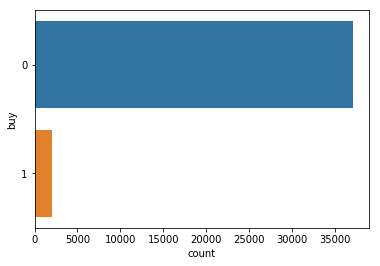

In [79]:
print(Data['buy'].value_counts())
sns.countplot(y='buy', data=Data)

The counts of leads purchasing the product having 'signup_date' = NULL

In [80]:
(Data[Data['signup_date'].isnull()]['buy']).value_counts()

0    15088
1       25
Name: buy, dtype: int64

Purchasing behaviour of the leads signing up after the creation of lead

In [81]:
(Data[Data['created_at'] < Data['signup_date']]['buy']).value_counts()

0    5485
1     359
Name: buy, dtype: int64

Purchasing behaviour of the already signed up leads

In [82]:
(Data[Data['created_at'] > Data['signup_date']]['buy']).value_counts()

0    16570
1     1612
Name: buy, dtype: int64

#### For 'signup_date' we are having 38.59% missing values so for this we have created a categorical column signup_status without removing the missing values out of 'signup_date' and 'created_at' with the domain values ( 'signup_after_camp', 'Others', 'already_signed_up' ) 

In [83]:
Data['signup_status'] = np.where(Data['created_at'] > Data['signup_date'], "already_signed_up", np.where(Data["signup_date"].isnull(),"Others", "signup_after_camp"))

already_signed_up    18182
Others               15113
signup_after_camp     5866
Name: signup_status, dtype: int64


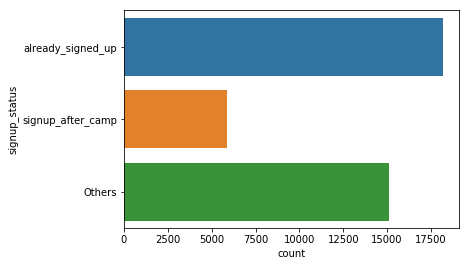

In [84]:
print(Data['signup_status'].value_counts())
sns.countplot(y='signup_status', data=Data)

buy                    0     1
signup_status                 
Others             15088    25
already_signed_up  16570  1612
signup_after_camp   5505   361


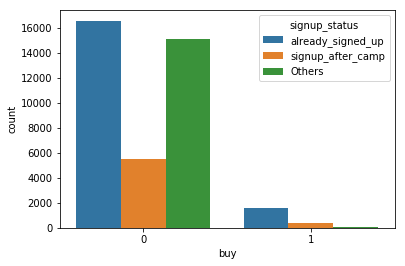

In [85]:
print(pd.crosstab(Data['buy'], Data['signup_status']).T)
sns.countplot(x='buy', data=Data, hue='signup_status')

Customers with missing signup_date and already_signed_up status have lesser chances of purchasing.

signup_status       Others  already_signed_up  signup_after_camp
products_purchased                                              
1.0                    741               2069                833
2.0                   1896               5442               1529
3.0                   1071               3343                610
4.0                    144                506                 66


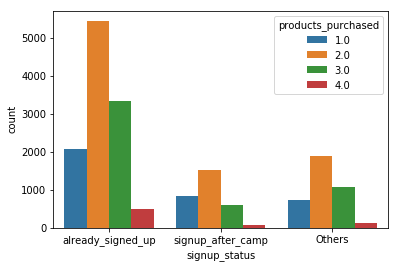

In [86]:
print(pd.crosstab(Data['signup_status'], Data['products_purchased']).T)
sns.countplot(x='signup_status', data=Data, hue='products_purchased')

Extracted the Year, Month and day from the 'created_at' column to be able to use in the model

In [87]:
Data['created_at_Year']=pd.DatetimeIndex(Data['created_at']).year
Data['created_at_Month']=pd.DatetimeIndex(Data['created_at']).month
Data['created_at_day']=pd.DatetimeIndex(Data['created_at']).day

In [88]:
Data.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'signup_status',
       'created_at_Year', 'created_at_Month', 'created_at_day'],
      dtype='object')

Now we removed signup_date, created_at, id from the dataset 

In [90]:
df1=Data.loc[:, ~Data.columns.isin(['signup_date','created_at','id'])]

In [91]:
df1.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'signup_status', 'created_at_Year', 'created_at_Month',
       'created_at_day'],
      dtype='object')

In [92]:
df=df1.copy()

In [93]:
df.columns

Index(['campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'signup_status', 'created_at_Year', 'created_at_Month',
       'created_at_day'],
      dtype='object')

In [94]:
df['products_purchased'] = df['products_purchased'].fillna(0)

In [95]:
print(df.isnull().sum())
print(df.info())

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
signup_status           0
created_at_Year         0
created_at_Month        0
created_at_day          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161 non-null  int64  
 

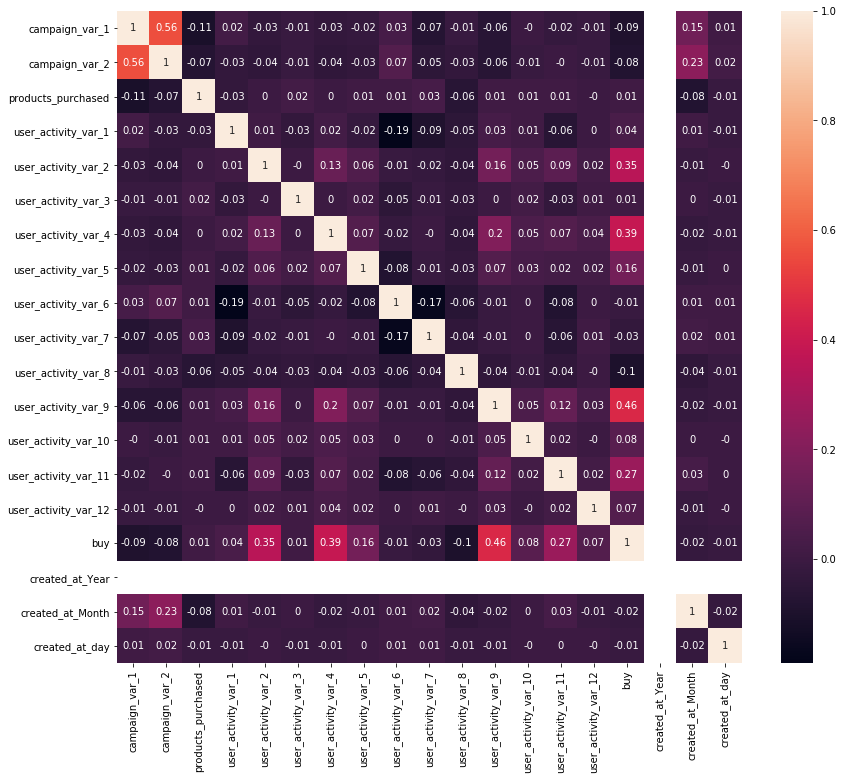

In [96]:
plt.figure(figsize = (14,12))
sns.heatmap(round(df.corr(),2),annot=True)

In [97]:
df.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,signup_status,created_at_Year,created_at_Month,created_at_day
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,already_signed_up,2021,1,1
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,already_signed_up,2021,1,1
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,signup_after_camp,2021,1,1
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,already_signed_up,2021,1,1
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,already_signed_up,2021,1,1


## Separated the independent and dependent features

In [145]:
X = df.loc[:,~df.columns.isin(['buy'])]
y = df.loc[:,'buy']

In [139]:
print(df.nunique())
print(X.info())

campaign_var_1          16
campaign_var_2          15
products_purchased       5
user_activity_var_1      4
user_activity_var_2      2
user_activity_var_3      2
user_activity_var_4      2
user_activity_var_5      3
user_activity_var_6      4
user_activity_var_7      3
user_activity_var_8      3
user_activity_var_9      2
user_activity_var_10     2
user_activity_var_11     5
user_activity_var_12     2
buy                      2
signup_status            3
created_at_Year          1
created_at_Month        12
created_at_day          31
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_var_1        39161 non-null  int64  
 1   campaign_var_2        39161 non-null  int64  
 2   products_purchased    39161 non-null  float64
 3   user_activity_var_1   39161 non-null  int64  
 4   user_activity_var_2   39161

#### One hot encoding of 'signup_status'

In [146]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[15])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.000e+00 1.000e+00 0.000e+00 ... 2.021e+03 1.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 0.000e+00 ... 2.021e+03 1.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 1.000e+00 ... 2.021e+03 1.000e+00 1.000e+00]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 2.021e+03 1.200e+01 3.100e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.021e+03 1.200e+01 3.100e+01]
 [0.000e+00 1.000e+00 0.000e+00 ... 2.021e+03 1.200e+01 3.100e+01]]


#### Train test split 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)

# Checking for Best model

In [152]:
models = {

    'Logistic Regression(Ridge)' : RidgeClassifier(),

    '             Random Forest' : RandomForestClassifier(),

    '                  Catboost' : CatBoostClassifier(verbose=0),

    '        XGBoost Classifier' : XGBClassifier(),

    '       Logistic Regression' : LogisticRegression(),

    '   Light Gradient Boosting' : LGBMClassifier()

}

for name, model in models.items():

    model.fit(X_train, y_train)

    print(name + ' trained.')

Logistic Regression(Ridge) trained.
             Random Forest trained.
                  Catboost trained.
        XGBoost Classifier trained.
       Logistic Regression trained.


C:\Users\Rupak Dey\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


   Light Gradient Boosting trained.


In [154]:
for name, model in models.items():

    y_pred = model.predict(X_test)

    f1_scores = f1_score(y_test, y_pred)

    print(name + ' f1_score: {:}'.format(f1_scores))

Logistic Regression(Ridge) f1_score: 0.6115702479338844
             Random Forest f1_score: 0.6998444790046656
                  Catboost f1_score: 0.7057010785824345
        XGBoost Classifier f1_score: 0.701062215477997
       Logistic Regression f1_score: 0.4181818181818182
   Light Gradient Boosting f1_score: 0.710077519379845


#### LGBM Classifier

In [155]:
import lightgbm as lgb

In [158]:
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [169]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

[[7417   16]
 [ 171  229]]
0.9761266436869654
0.5725
0.710077519379845


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.93      0.57      0.71       400

    accuracy                           0.98      7833
   macro avg       0.96      0.79      0.85      7833
weighted avg       0.98      0.98      0.97      7833



In [184]:
test=pd.read_csv("test.csv")

In [185]:
test['signup_status']=np.where(test['created_at'] > test['signup_date'], "already_signed_up", np.where(test["signup_date"].isnull(),"Others", "signup_after_camp"))
test['created_at_Year']=pd.DatetimeIndex(test['created_at']).year
test['created_at_Month']=pd.DatetimeIndex(test['created_at']).month
test['created_at_day']=pd.DatetimeIndex(test['created_at']).day
drop_columns=['id','signup_date','created_at']
test=test.drop(drop_columns, axis = 1)

In [186]:
test['products_purchased']=test['products_purchased'].fillna(0)
test=np.array(ct.fit_transform(test))

In [189]:
predicted_test=classifier.predict(test)

In [190]:
predicted_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [191]:
ss=pd.read_csv("sample_submission.csv")

In [192]:
ss

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1
...,...,...
13179,52341,1
13180,52342,1
13181,52343,1
13182,52344,1


In [194]:
ss['buy']=predicted_test
ss.to_csv('Sample_submition.csv', index=False)